In [1]:
# X dataset (array de 2 dimensiones) de puntos a clusterizar
# n numero de datos
# m numero de caracteristicas
# Z matriz de enlace
# k numero de clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Generamos datos aleatorios
np.random.seed(4711)
# El metodo multivariate_normal genera un array de varias dimensiones con una distribucion normal multivariante
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape) # 150 filas, 2 columnas

(150, 2)


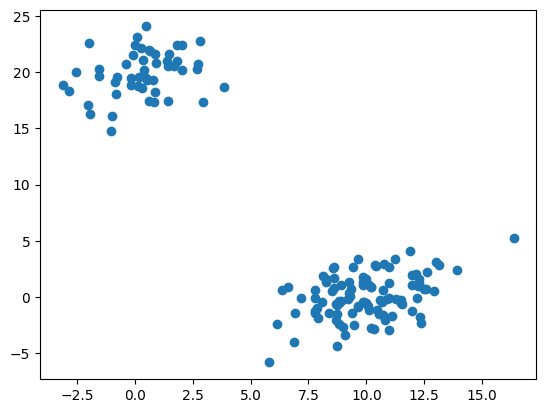

In [3]:
plt.scatter(X[:,0], X[:,1]) # Se observa que hay 2 grupos claramente diferenciados

In [4]:
Z = linkage(X, 'ward') # Se genera la matriz de enlace
Z # Son muchos datos, se puede ver en la consola. Se observa que hay 149 filas, 4 columnas

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [5]:
from scipy.cluster.hierarchy import cophenet # Coeficiente de correlacion
from scipy.spatial.distance import pdist # Distancia entre puntos

c, coph_dist = cophenet(Z, pdist(X)) 

print(c) # 98% de conservacion de la distancia original

0.9800148387574268


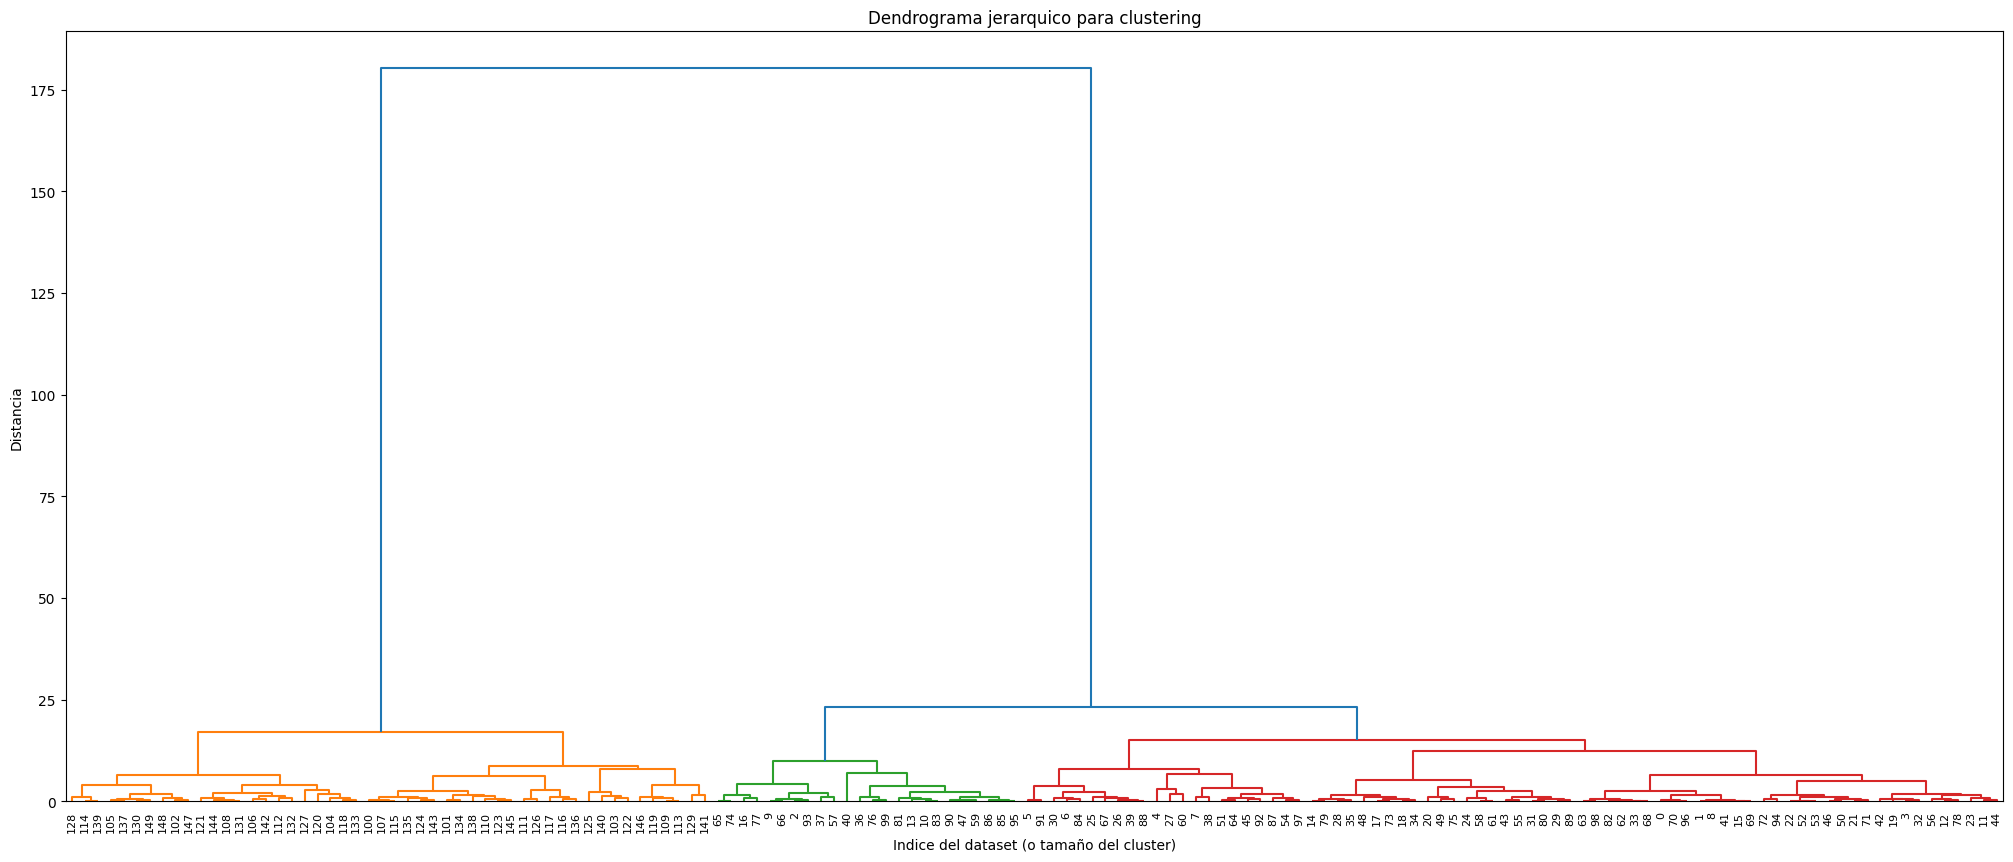

In [6]:
# Representacion grafica del dendrograma
plt.figure(figsize=(25, 10))
plt.title('Dendrograma jerarquico para clustering')
plt.xlabel('Indice del dataset (o tamaño del cluster)')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=0.1 * 180)
plt.show()

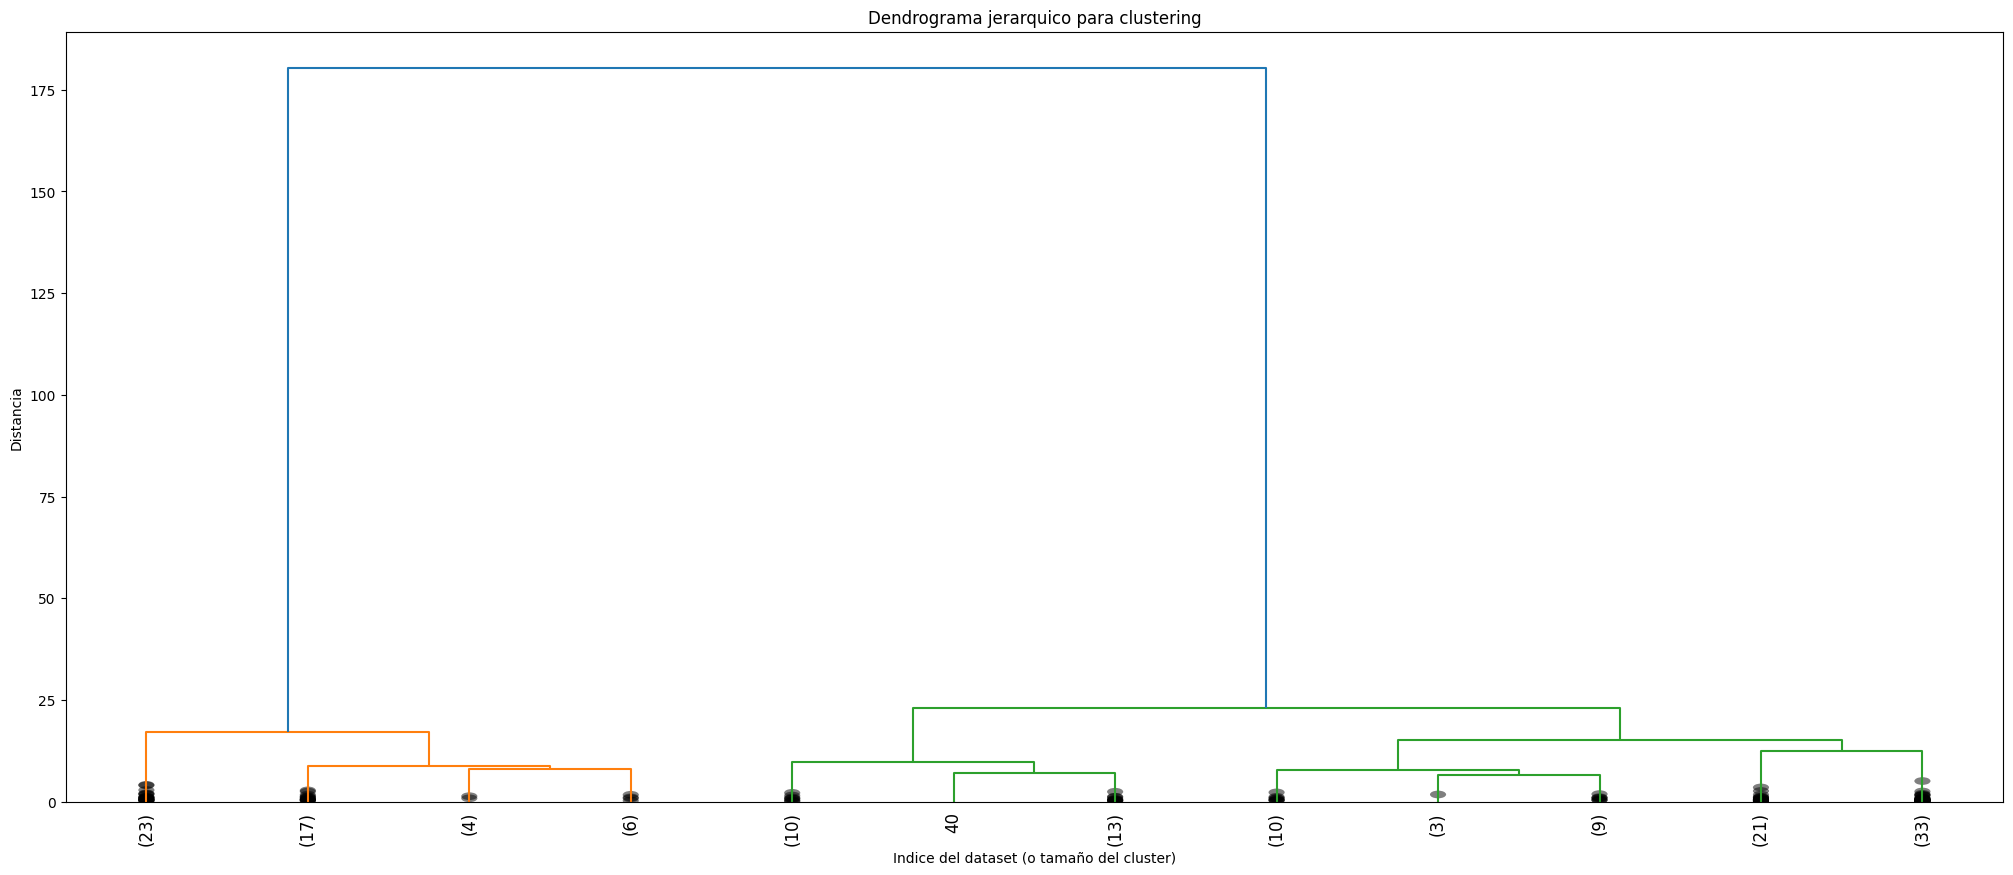

In [7]:
# El 70% de la distancia es la que determina el color del dendograma

# Tambien se puede truncar el dendograma
plt.figure(figsize=(25, 10))
plt.title('Dendrograma jerarquico para clustering')
plt.xlabel('Indice del dataset (o tamaño del cluster)')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, show_leaf_counts=True)
plt.show() 

In [8]:
# Dendrograma tuneado
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    if not kwargs.get("no_plot", False):
        plt.title('Dendrograma jerarquico para clustering')
        plt.xlabel('Indice del dataset (o tamaño del cluster)')
        plt.ylabel('Distancia')
        ddata = dendrogram(*args, **kwargs)
        for i, d, c in zip(ddata['icoord'], ddata["dcoord"], ddata["color_list"]):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    if 'no_plot' in kwargs:
        kwargs.pop('no_plot')
    return ddata

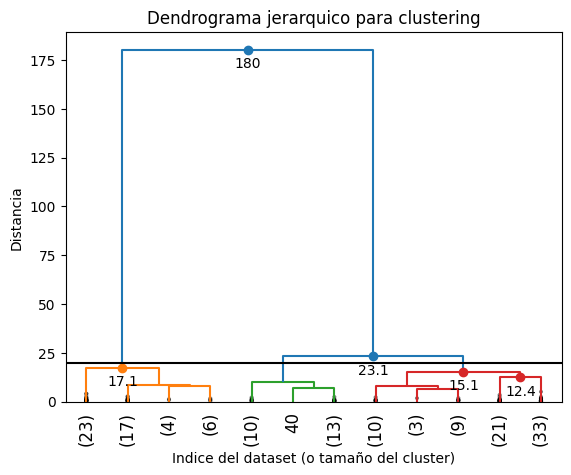

In [9]:
dendo = dendrogram_tune(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=20)
plt.show()

Inconsistency = $(h_i-avg(h_j))/std(h_j)$

In [10]:
# ¿Que es lo que hace que la distancia de un cluster a otro salte?
# Python usa el metodo de la inconsistencia para calcular la distancia entre clusters
# La inconsistencia es la diferencia entre la distancia de un cluster a otro y la distancia de un cluster a otro
# Corte automatico del dendograma
from scipy.cluster.hierarchy import inconsistent
depth = 3

incons = inconsistent(Z, depth)
incons # Promedio, desviacion estandar, numero de elementos en el cluster, numero de elementos en el cluster
incons[-10:] # Se observa que la distancia de los clusters es muy baja
# El valor de insconsistencia lo que hace es comparar la altura a la que se forma cada cluster. 
# Si la altura es muy baja, quiere decir que los clusters se forman muy cerca unos de otros
# Los valores de inconsistencia son dependientes de la profundidad del arbol
# La profundidad del arbol es el numero de clusters que se forman

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

Text(0, 0.5, 'Distancia')

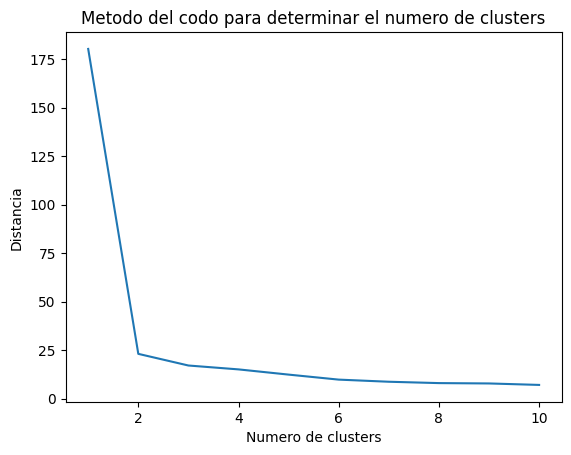

In [11]:
# El metodo del codo
# El metodo del codo intenta buscar el paso del clustering donde la distancia entre clusters empieza a aumentar
last = Z[-10:, 2] # Las ultimas 10 distancias
last_rev = last[::-1] # Invertimos el array
idx = np.arange(1, len(last) + 1) # Creamos un array con los indices
plt.plot(idx, last_rev) # Representamos el array
plt.title('Metodo del codo para determinar el numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Distancia')



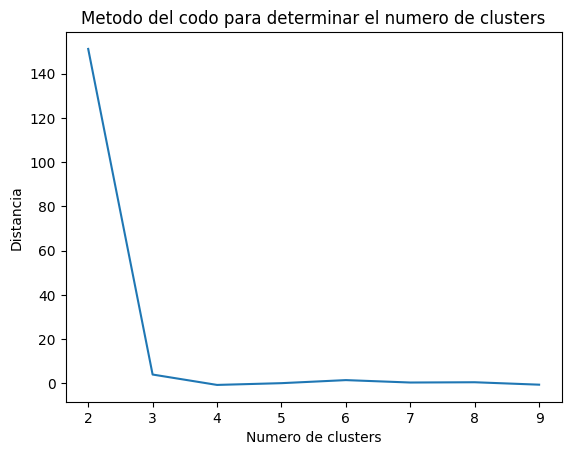

Numero optimo de clusters: 2


In [12]:
acc = np.diff(last, 2) # 2nd derivative of the distances
acc_rev = acc[::-1]

plt.plot(idx[:-2] + 1, acc_rev)
plt.title('Metodo del codo para determinar el numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Distancia')
plt.show()
k = acc_rev.argmax() + 2 # El numero de clusters es el maximo de la derivada + 2
print('Numero optimo de clusters: %s' % k)


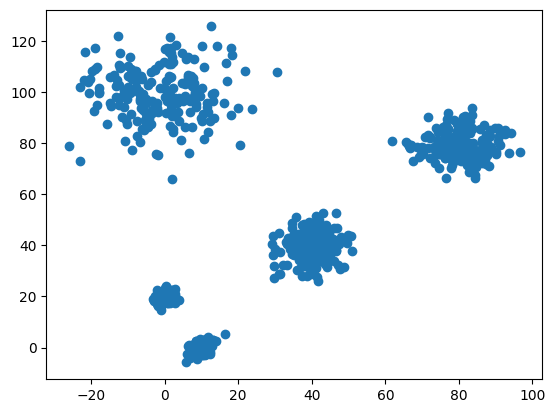

In [13]:
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])

X2 = np.concatenate((X, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()


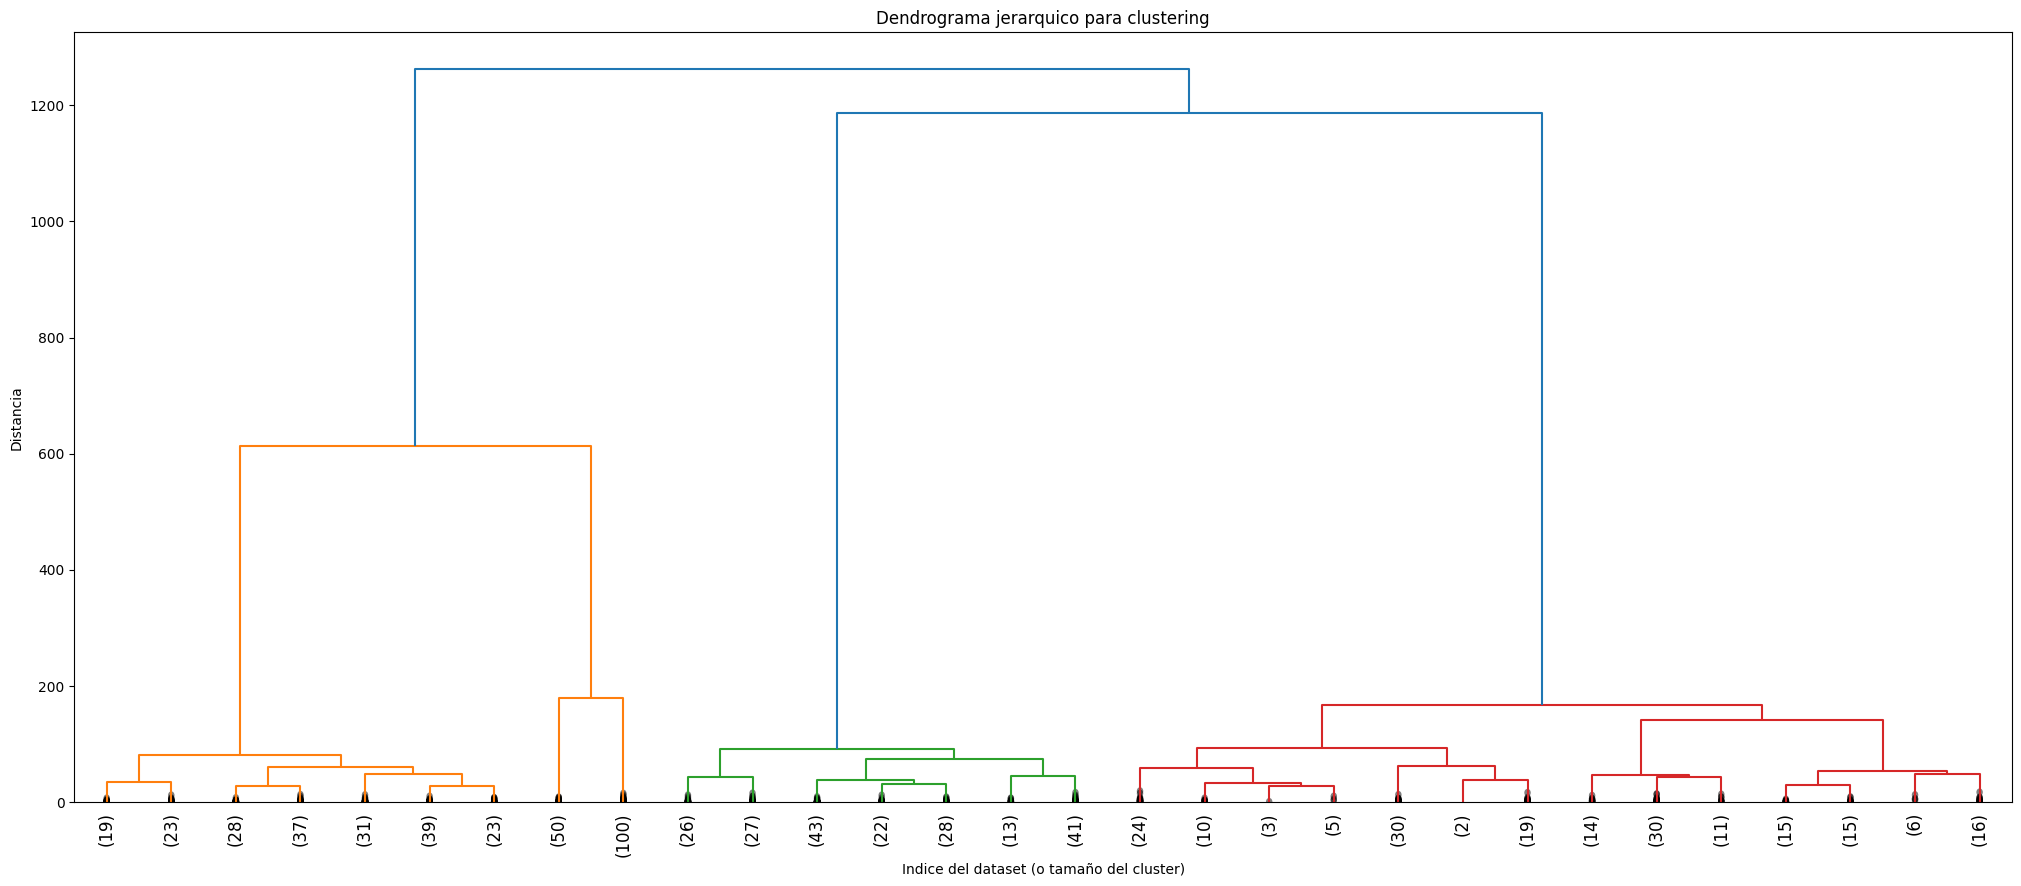

In [14]:

Z2 = linkage(X2, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Dendrograma jerarquico para clustering')
plt.xlabel('Indice del dataset (o tamaño del cluster)')
plt.ylabel('Distancia')
dendrogram(Z2, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True, show_leaf_counts=True)
plt.show()

Numero optimo de clusters: 4


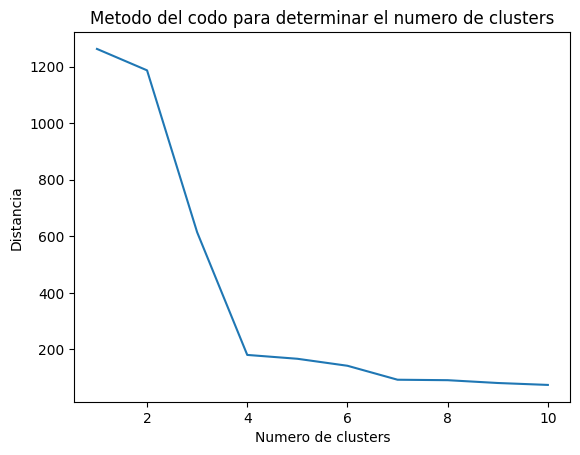

In [15]:
# Metodo del codo
last = Z2[-10:, 2] # Las ultimas 10 distancias
last_rev = last[::-1] # Invertimos el array
idx = np.arange(1, len(last) + 1) # Creamos un array con los indices
plt.plot(idx, last_rev) # Representamos el array
plt.title('Metodo del codo para determinar el numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Distancia')

# Segunda derivada
acc = np.diff(last, 2) # 2nd derivative of the distances
acc_rev = acc[::-1]
k = acc_rev.argmax() + 2 # El numero de clusters es el maximo de la derivada + 2
print('Numero optimo de clusters: %s' % k)

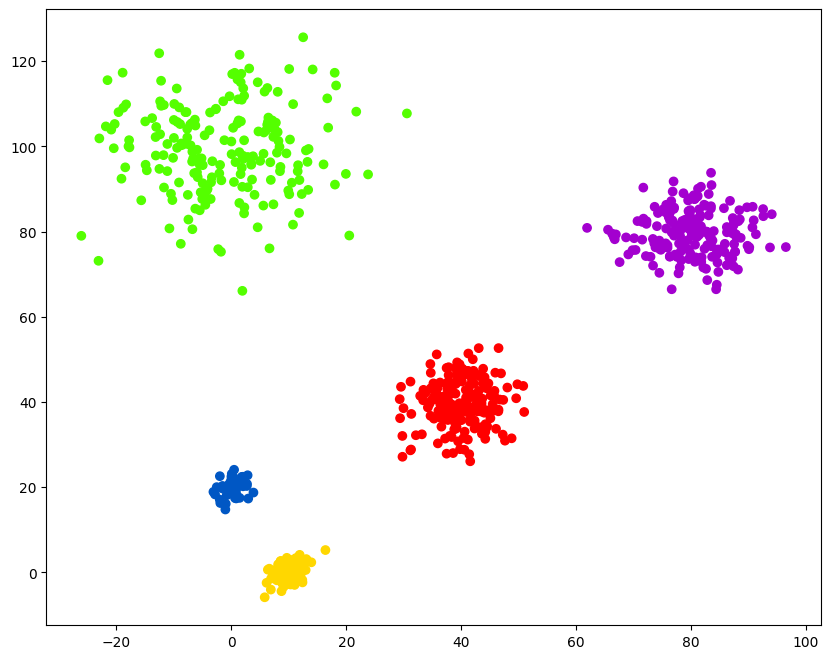

In [16]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(Z2, 170, criterion='distance', depth=10) # El numero de clusters es el maximo de la derivada + 2

# Representamos los clusters
plt.figure(figsize=(10, 8))
plt.scatter(X2[:,0], X2[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()